<a href="https://colab.research.google.com/github/Valeria-Perotto/fetal-health/blob/main/ProgettoFinale_ValeriaPerotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FETAL HEALTH CLASSIFICATION

Come progetto finale del mio percorso ho scelto di andare ad analizzare un  dataset riguardante la salute fetale.
Nello specifico andrò ad addestrare diversi modelli di machine learning (utilizzando diversi metodi ) che sulla base di 22 variabili misurate su 2126 casi dovranno riuscire a classificare correttamente i nuovi dati ,dividendoli in: sospetti,patologici o normali.




 ### DESCRIZIONE DEI DATI
- VARIABILI:
Il set di dati contiene dati provenienti da cardiotocogrammi (CTG). I CTG descrivono i risultati degli ultrasuoni; tra i principali indicatori di salute fetale troviamo la frequenza cardiaca fetale e le contrazioni uterine , dati essenziali e semplici nel fornire informazioni sulla salute attuale del feto e potrebbero essere il primo indicatore di sofferenza fetale.
- CLASSI :
1. Normale = il feto non è in sofferenza 
2. Sospetto = c'è la possibilità di un problema 
3. Patologico = il feto effettivamente ha dei problemi


### ANALISI DATI

In [ ]:
#IMPORTO LE LIBRERIE NECESSARIE 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import files
#sklearn
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#metriche 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#modelli
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier




###CARICO I DATI NECESSARI


In [ ]:
#Carico il dataset che andrò ad analizzare 

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df= pd.read_csv('gdrive/MyDrive/Progetto finale/fetal_health.csv')


Mounted at /content/gdrive


###INFORMAZIONI DI BASE DEL DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

- Da qui vediamo il numero delle colonne e il fatto che i dati sono tutti numeri decimali

In [ ]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

 - non ci sono valori mancanti.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Già da un primo sguardo a questa tabella possiamo notare che:
- Osservando la media si nota facilmente che c'è una grande variabilità tra le grandezze dei numeri e ciò comporta che probabilmente dovremmo andare ad effettuare una scalatura sui dati.
- La media della colonna delle classi è  circa 1,3 ,questo ci fa capire che probabilmente abbiamo un dataset sbilanciato (lo vedremo meglio più avanti)

###### EDA


In [ ]:
new_df = df.copy() #facciamo una copia del dataset per lavorarci senza modificare l'originale 

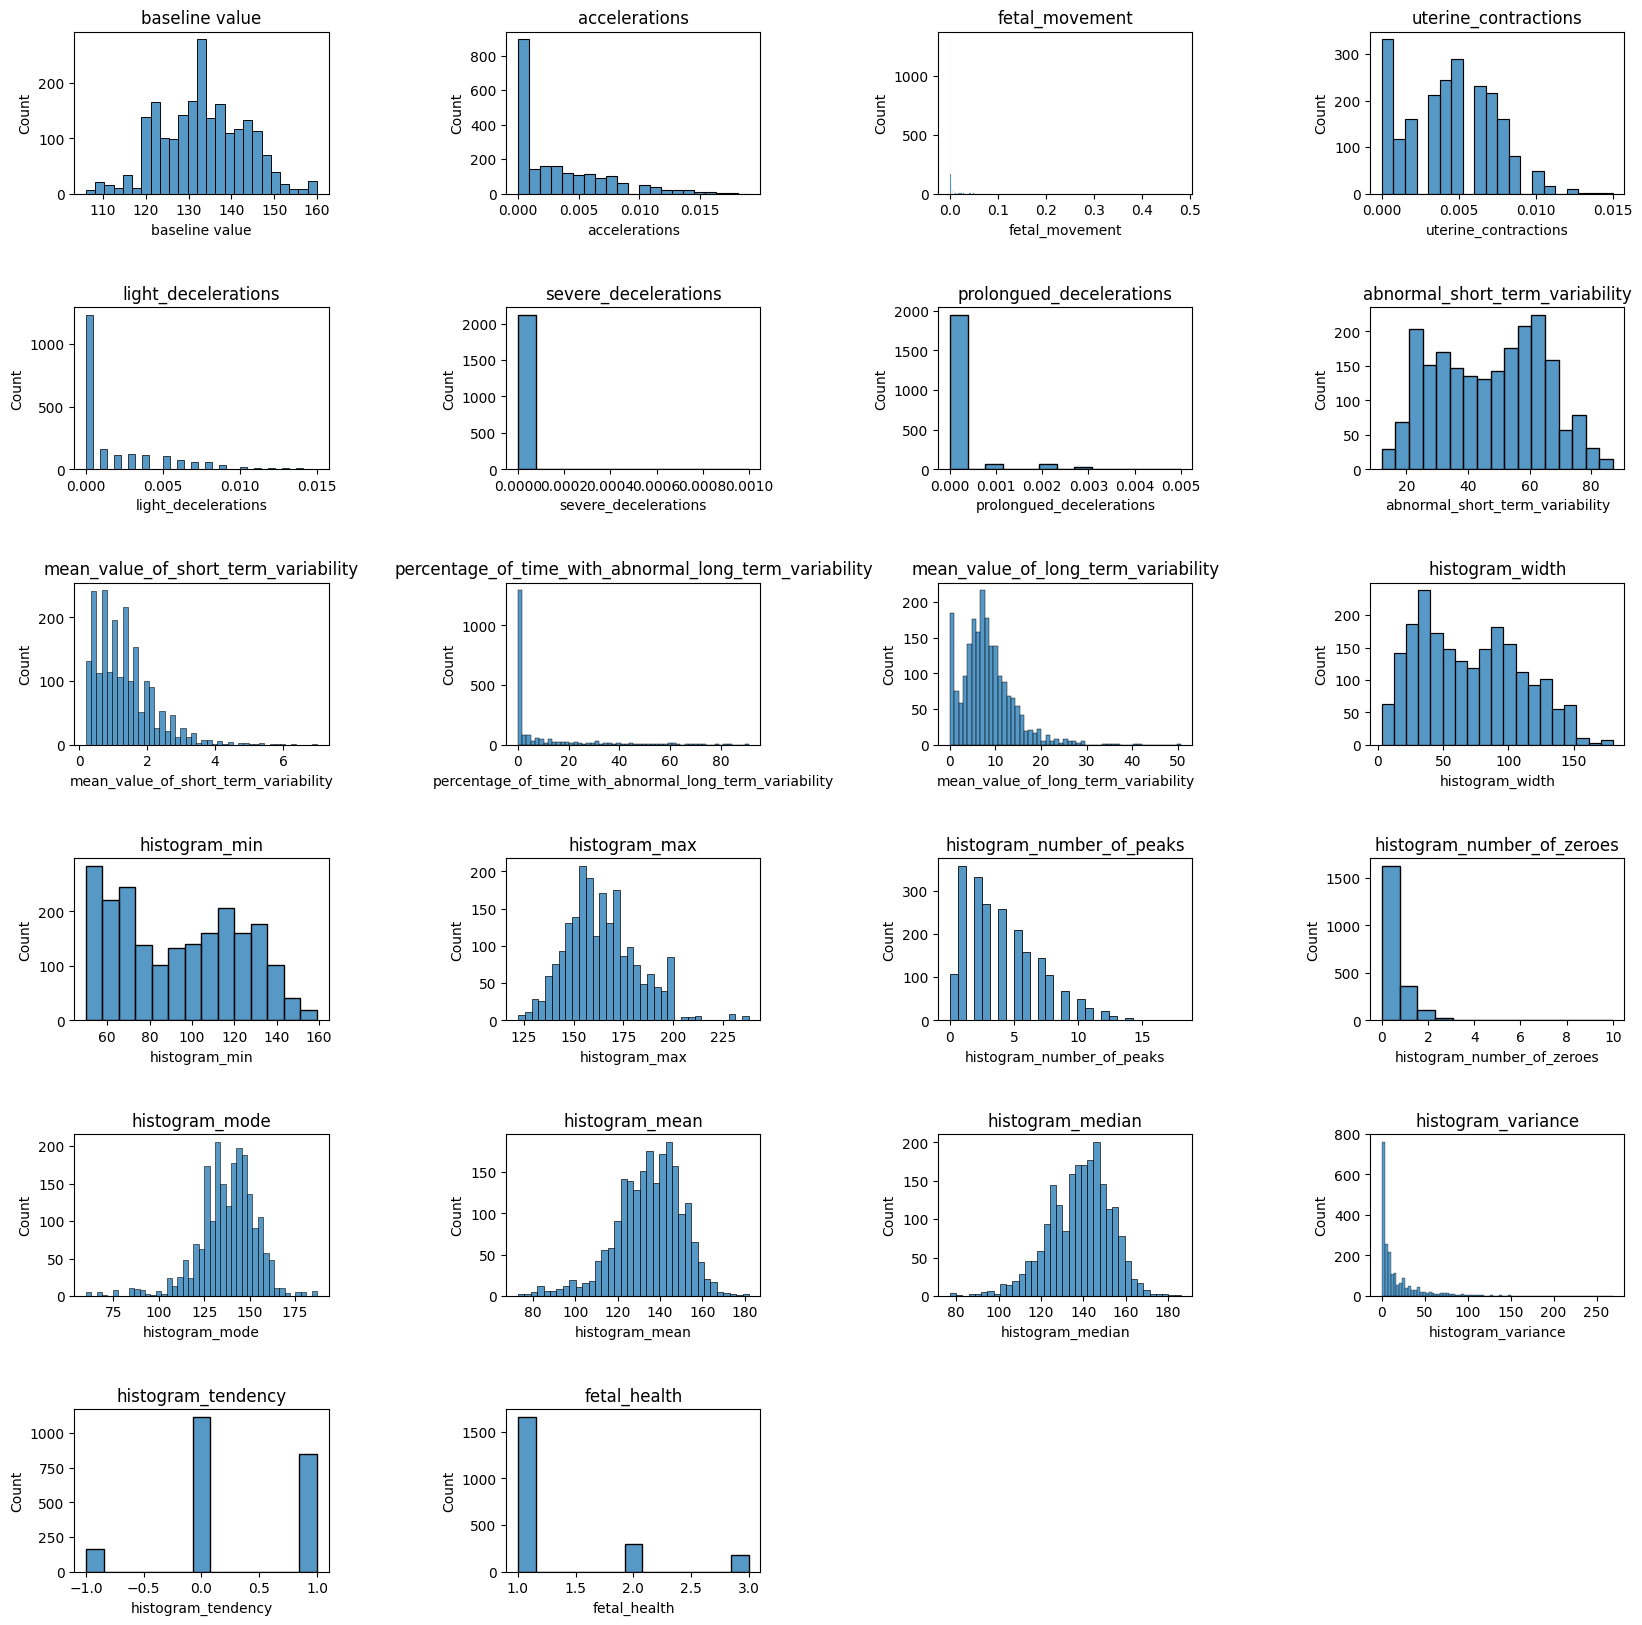

In [ ]:
# faremo un histplot per vedere la distribuzione dei dati delle varie features
plt.figure(figsize=(20,20))

for i,column  in enumerate (new_df.columns):
  plt.subplot(6, 4, i + 1 )
  plt.subplots_adjust(hspace= 0.7, wspace= 0.7)
  sns.histplot (new_df[column])
  plt.title (column )

plt.show()

- Come ci aspettavamo si può vedere  che le variabili non hanno una distribuzione standart e che hanno valori molto diversi tra loro, quindi come avevamo già ipotizzato andremo poi a scalare i dati.

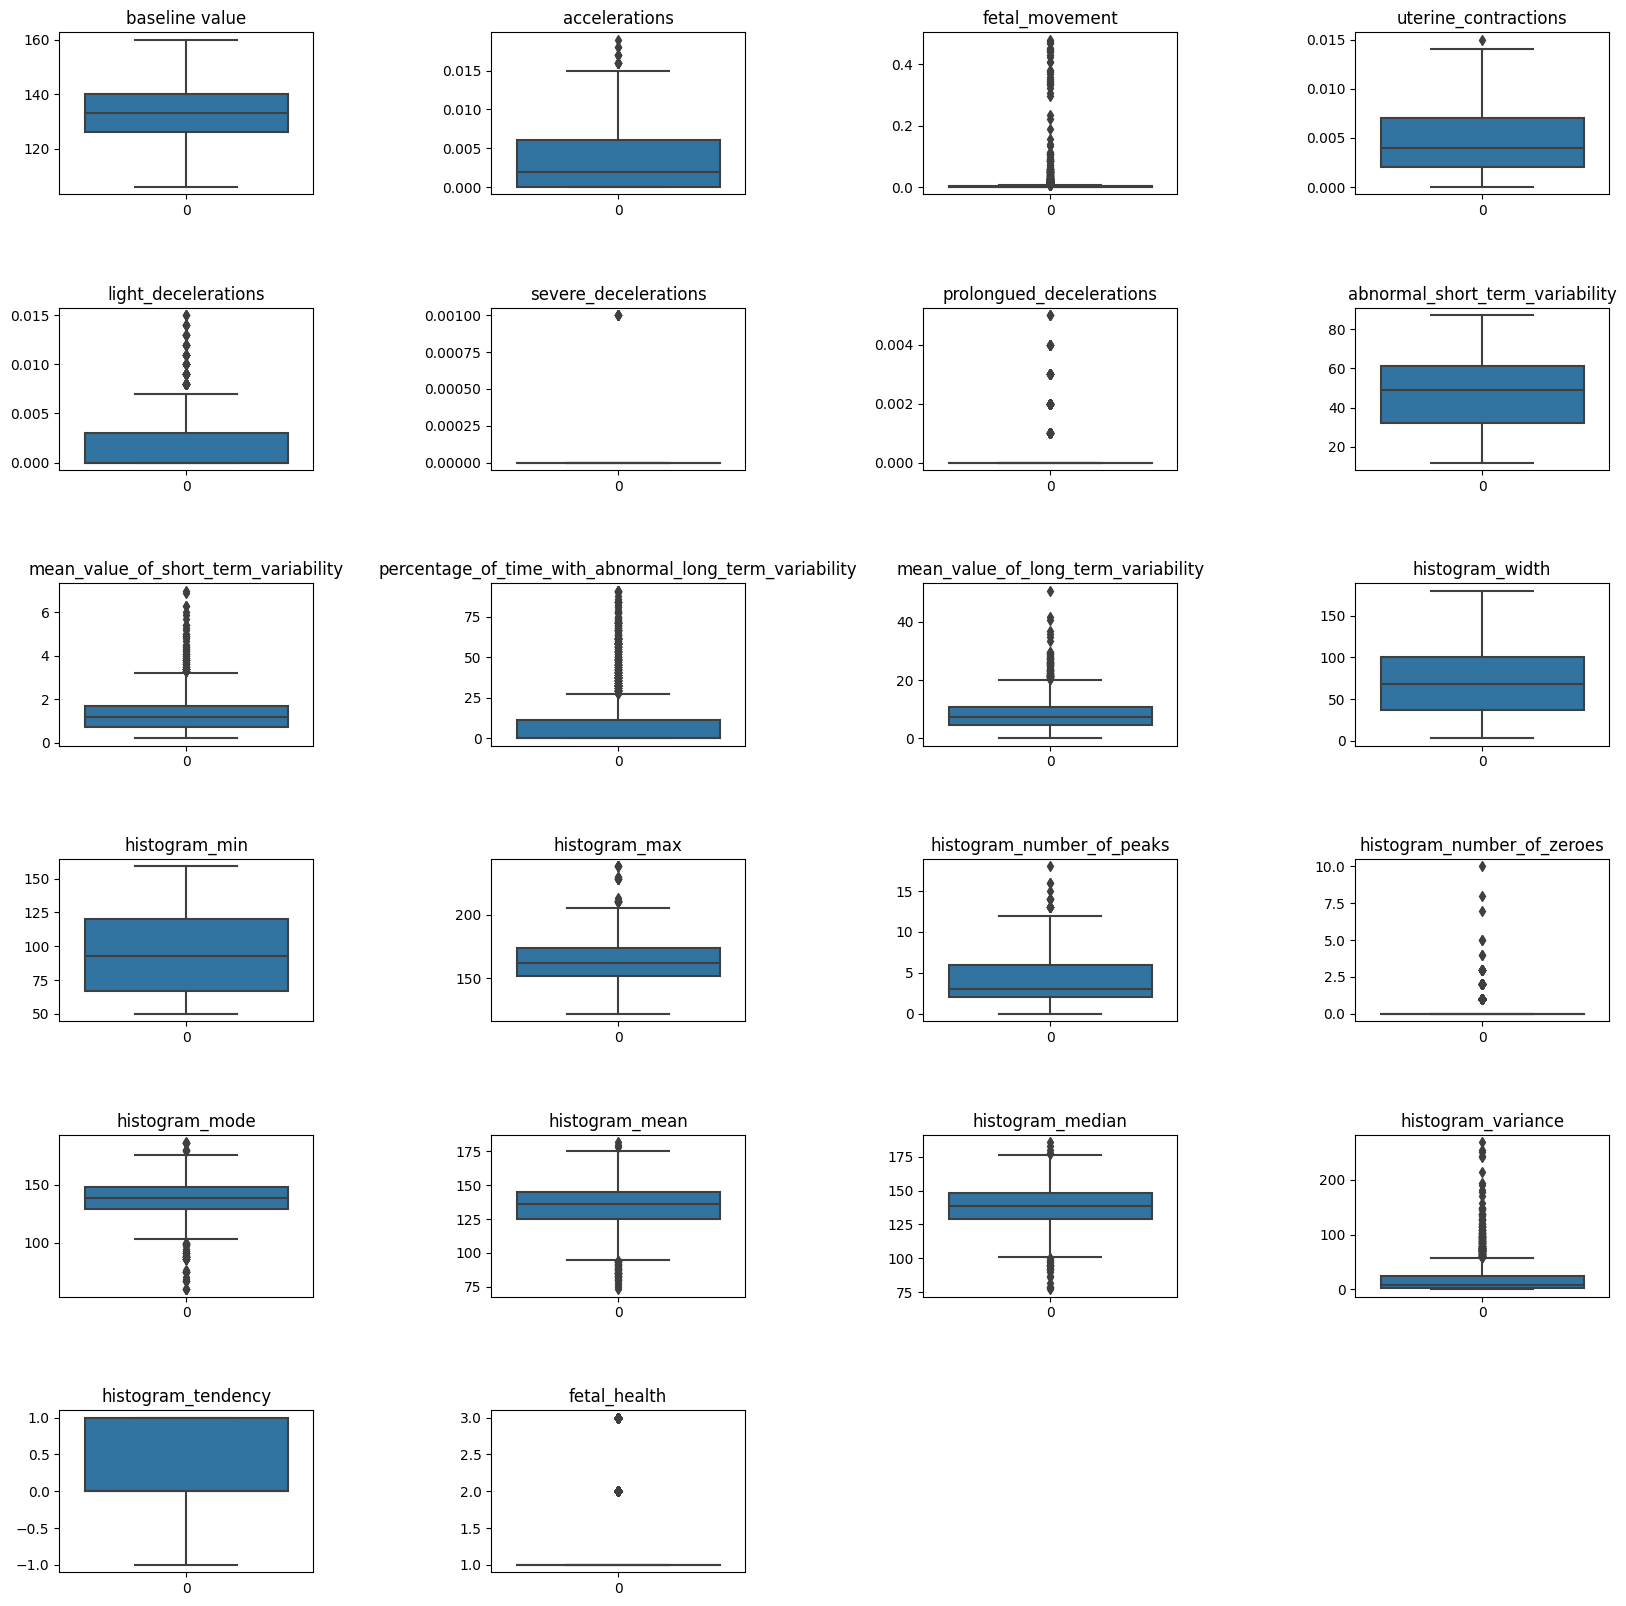

In [ ]:
#plottiamo i dati sotto forma di boxplot per vedere meglio gli outliers
plt.figure(figsize=(20,20))
for i,column  in enumerate (new_df.columns):
  plt.subplot(6, 4, i + 1 )
  plt.subplots_adjust(hspace= 0.7, wspace= 0.7)
  sns.boxplot (new_df[column])
  plt.title (column )

plt.show()

- tramite i due grafici(chiaro nel grafico con i boxplot) si nota la presenza di outliers che potrebbero compromettere il nostro lavoro.

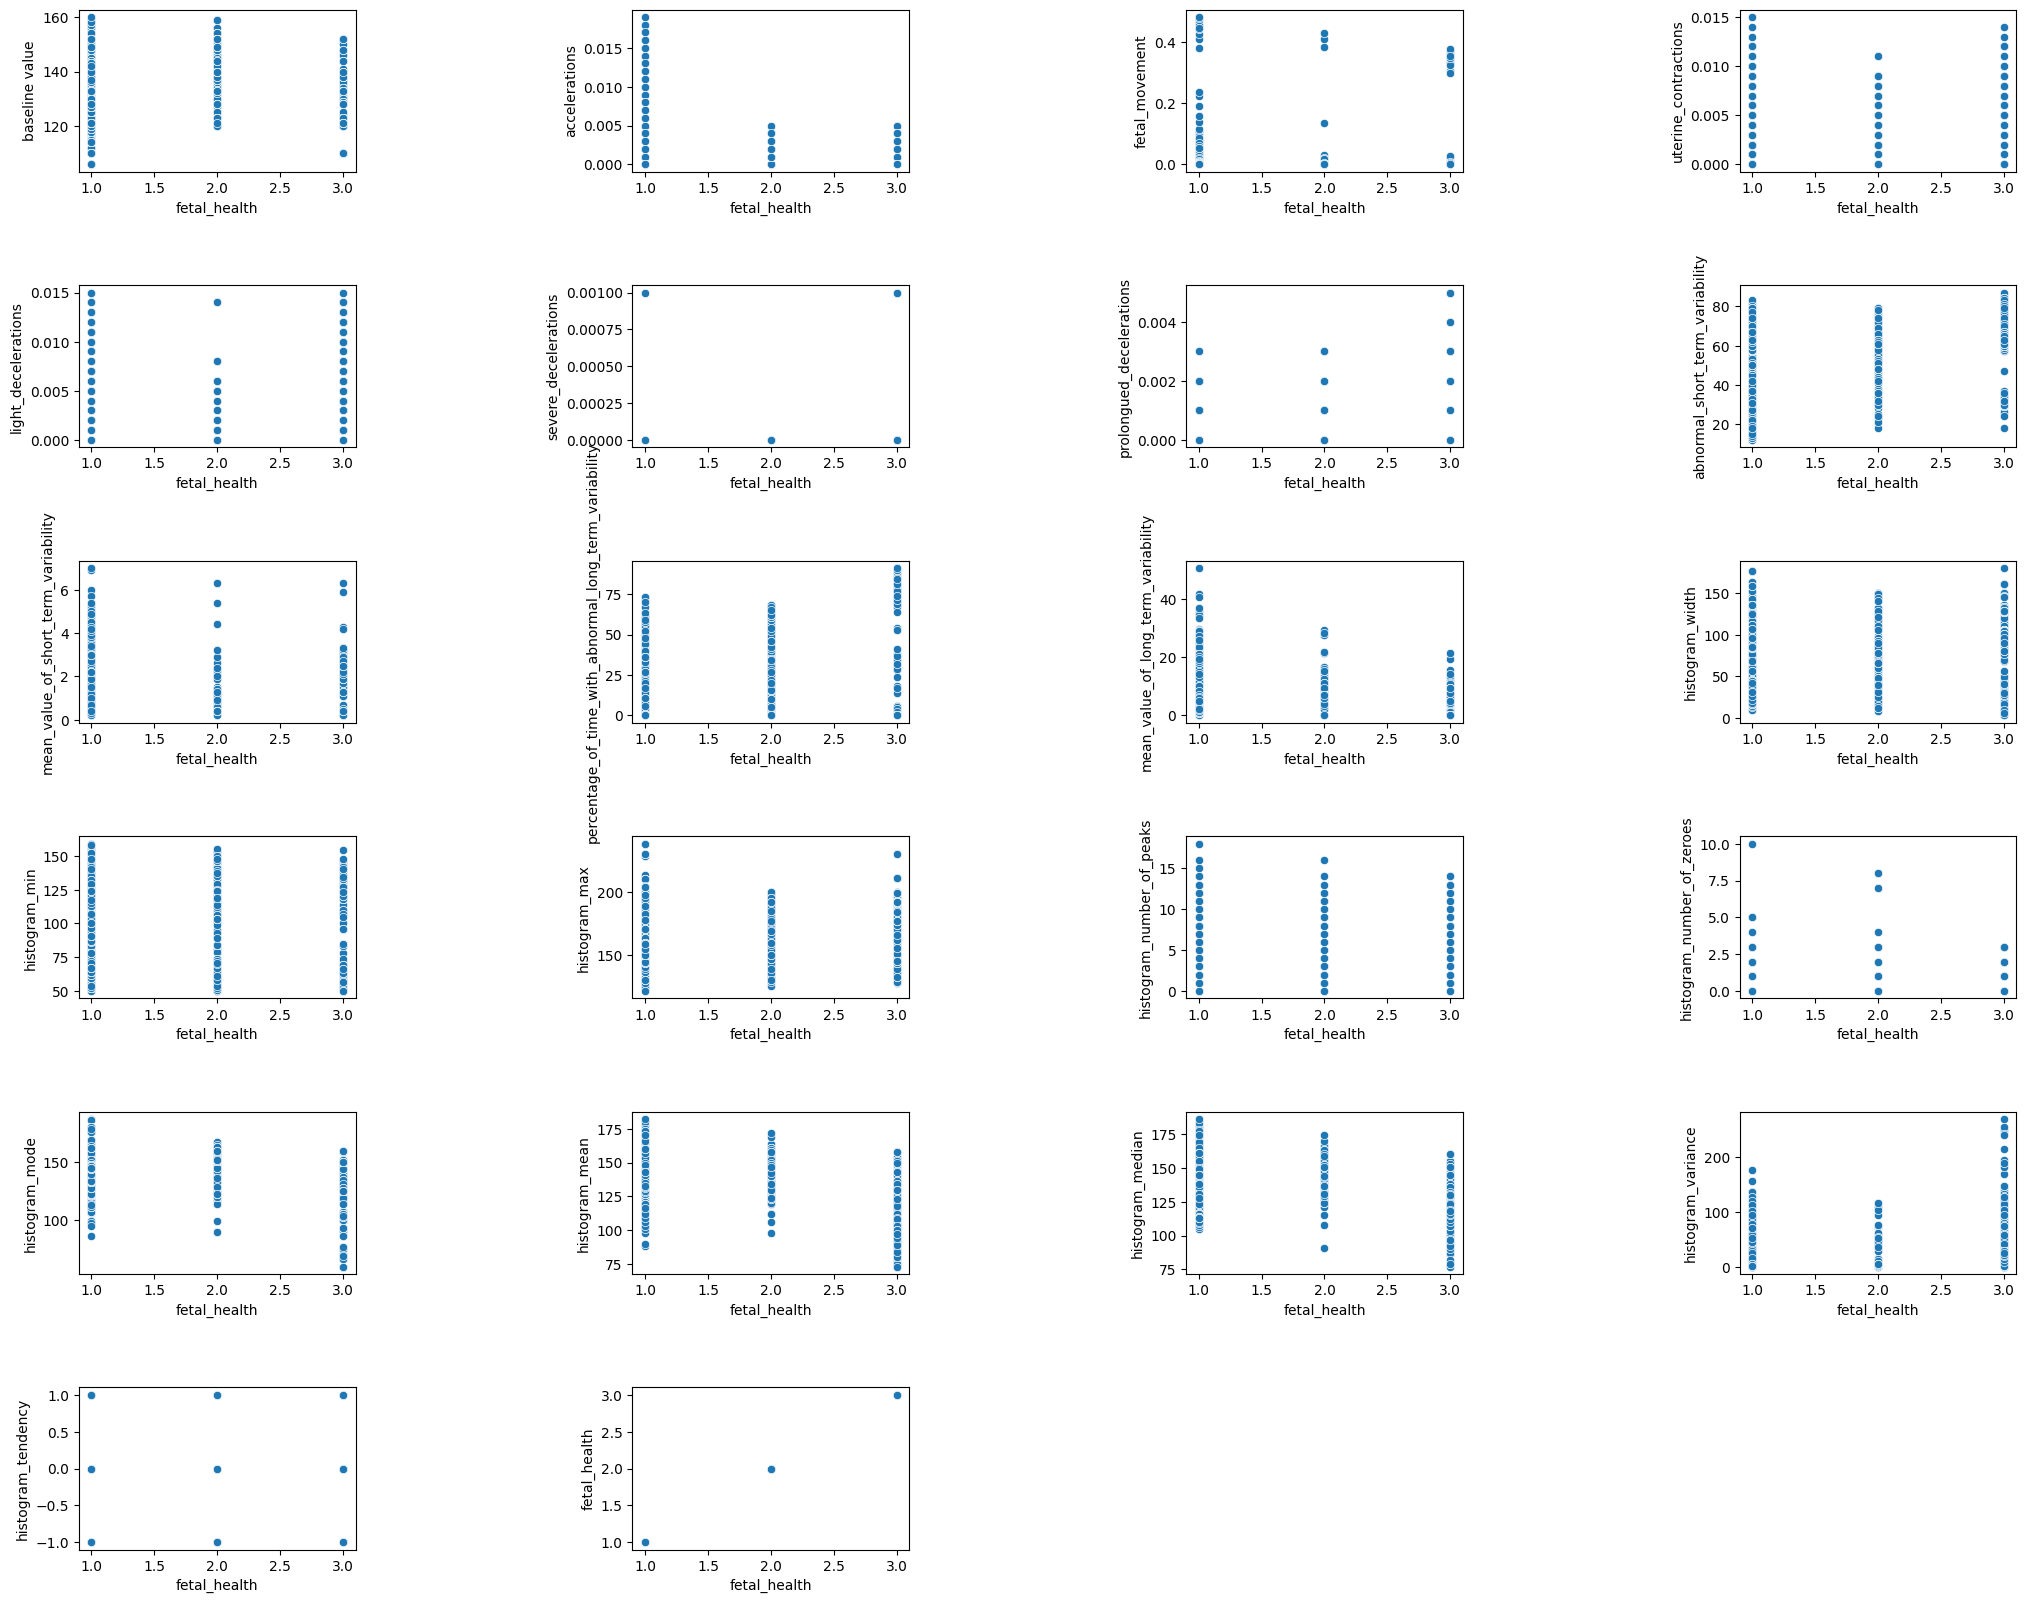

In [ ]:
#Grafico features vs value 
fig =plt.figure(figsize=(25,20))
 
for i,column  in enumerate (new_df.columns):
    plt.subplot(6, 4, i + 1 )
    plt.subplots_adjust(hspace= 0.7, wspace= 1)
    sns.scatterplot (x=new_df["fetal_health"] ,y=new_df[column])

plt.show()


- vediamo come si ditribuiscono i dati per le tre classi che dovremmo predirre 

### OUTLIER 

- Dal momento che si tratta di un dataset relativamente piccolo preferisco effettuare la ricerca degli outliers ed un eventuale  bilanciamento del dataset su tutti i dati.

In [ ]:
#Applico un isolation forest al dataset per individuare gli outliers
iforest = IsolationForest(n_estimators=100, contamination="auto")
iforest.fit(new_df)


IsolationForest()

In [ ]:
preds = iforest.predict(new_df) 
preds[:10]

array([-1,  1,  1,  1,  1, -1, -1, -1, -1, -1])

In [ ]:
X_outliers = new_df[preds == -1]
X_valid = new_df[preds != -1]


print("Original Samples : ",new_df.shape[0])
print("Number of Outliers : ", X_outliers.shape[0])
print("Number of Normal Samples : ", X_valid.shape[0])

Original Samples :  2126
Number of Outliers :  255
Number of Normal Samples :  1871


In [ ]:
#una volta individuati elimino gli outliers dal dataset per evitare che influenzino troppo il modello
for i in range(len(preds)):
    if preds[i] == -1:
        new_df.drop(i,inplace = True)


In [ ]:
new_df.shape

(1871, 22)

- tramite Isolation Forest abbiamo individuato ed eliminato gli outliers che avrebbero potuto influenzare il nostro dataset .

### BILANCIAMENTO DELLE CLASSI

In [ ]:
Class_name=["NORMALE","SOSPETTO","PATOLOGICO"] 

In [ ]:
new_df['fetal_health'].value_counts()

1.0    1548
2.0     271
3.0      52
Name: fetal_health, dtype: int64

Come avevamo supposto prima, le classi sono molto sbilanciate tanto che la classe 1 è quasi 10 volte più grande della classe 3 .

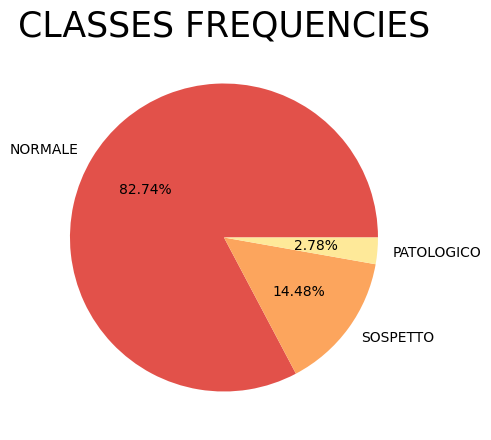

In [ ]:
#stampo le informazioni sulla frequenza delle 3 classi sotto forma di grafico a torta per visualizzare meglio i dati
plt.figure(figsize =(10,5))
plt.pie(
    new_df["fetal_health"].value_counts(),
    autopct="%.2f%%",
    labels=["NORMALE","SOSPETTO","PATOLOGICO"],
    colors= sns.color_palette("Spectral")
)
plt.title('CLASSES FREQUENCIES', fontsize=25)
plt.show()

Potremmo effettivamente bilanciare il dataset ma ci rimarrebbero pochi valori su cui lavorare ,senza contare che trattandosi di una classificazione multi-classe su un dataset riguardante una malattia rara è normale che sia sbilanciato e bilanciarlo potrebbe compromette il risultato dello studio.
Per questi motivi ho deciso di lasciare i dati così come sono .

### CORRELATION 


<Axes: title={'center': 'CORRELATION HEATMAP'}>

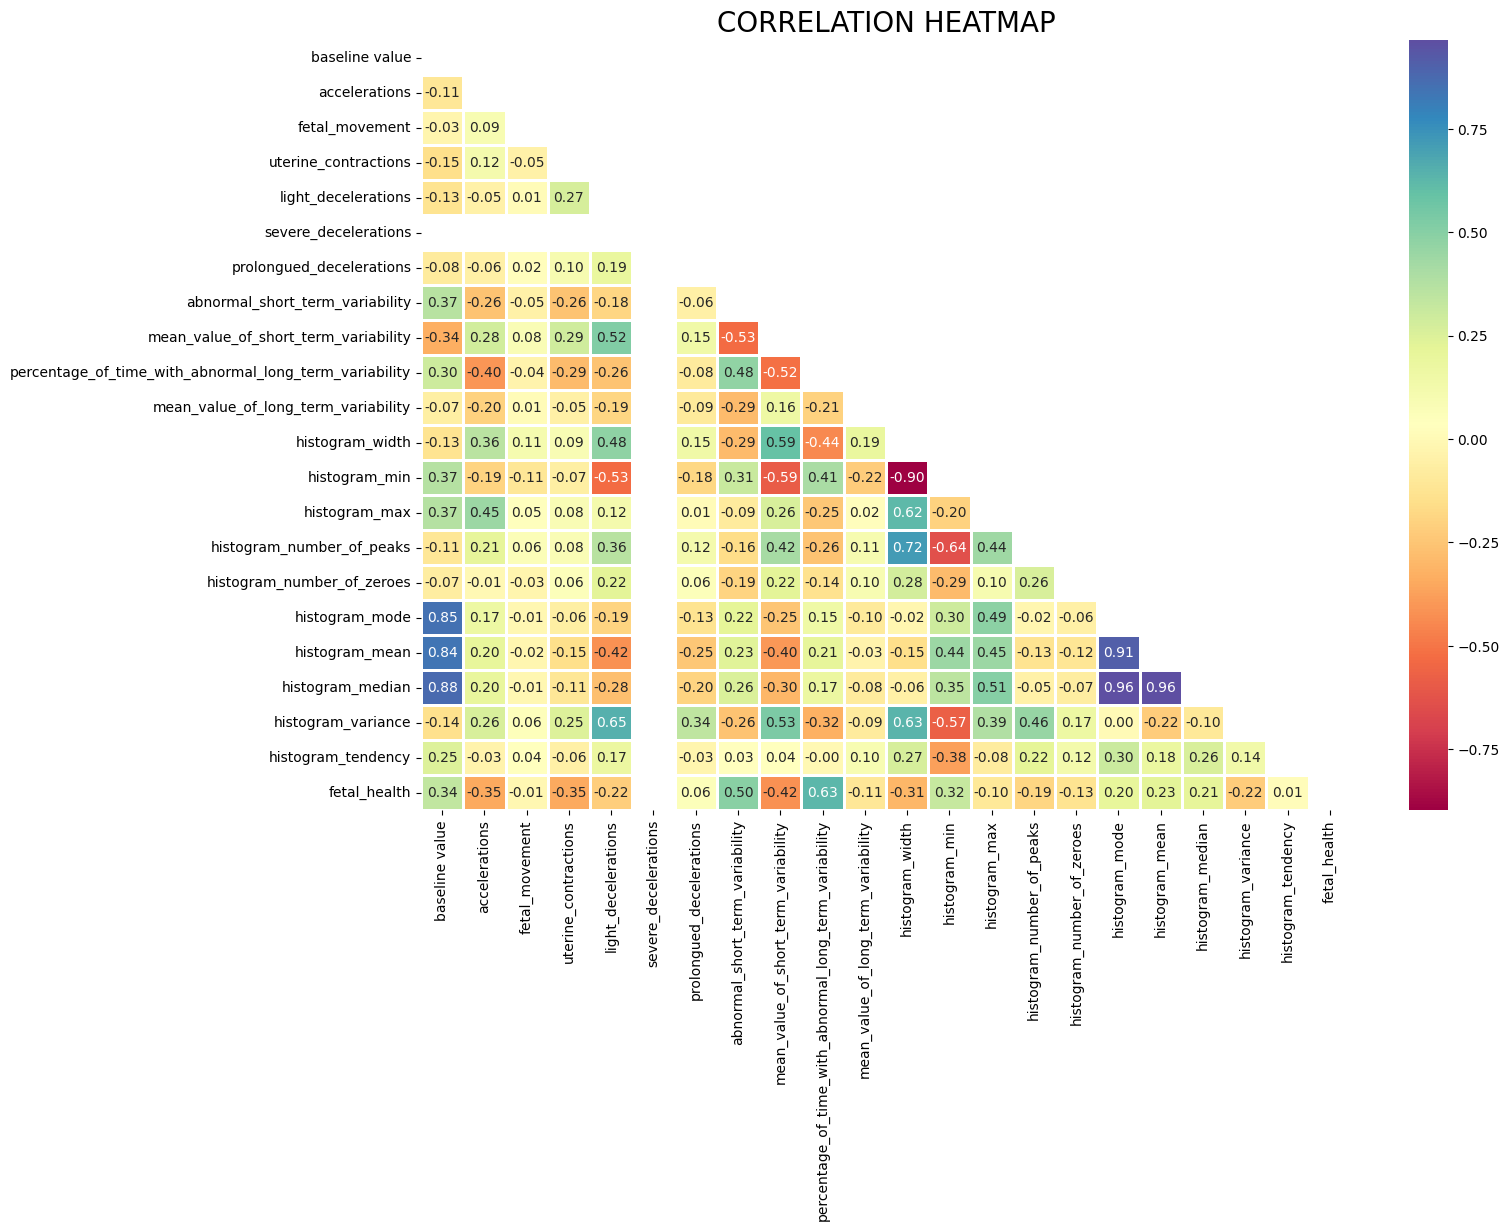

In [ ]:
plt.figure(figsize=(15,10))
plt.title("CORRELATION HEATMAP",fontsize=20)
#applico il mask
mask = np.triu(np.ones_like(new_df.corr()))
sns.heatmap(data=new_df.corr(),cmap = "Spectral",annot=True,  fmt=".2f",linewidths= 1, mask = mask)

Dal momento che si tratta di una classificazione multi-classe , più che sulla correlazione delle features con le labels, preferisco concentrarmi sulla correlazione tra le features.
Possiamo dedurre dal precedente grafico che:
- histogram_min / histogram_width hanno una correlazione negativa = -0.9
-baseline_value è altamente correlato sia con histogram_mode che con histogram_median
-histogram_mode,histogram_median ,histogram_mean sono tutti correlati tra loro. 

Dal momento che le correlazioni sono così alte , le variabili sono altamente dipendenti tra loro , ciò significa che potremmo eliminarne qualcuna.
Prima di decidere se e quale eliminare , faccio un grafico per vedere meglio la correlazione e la distribuzione.

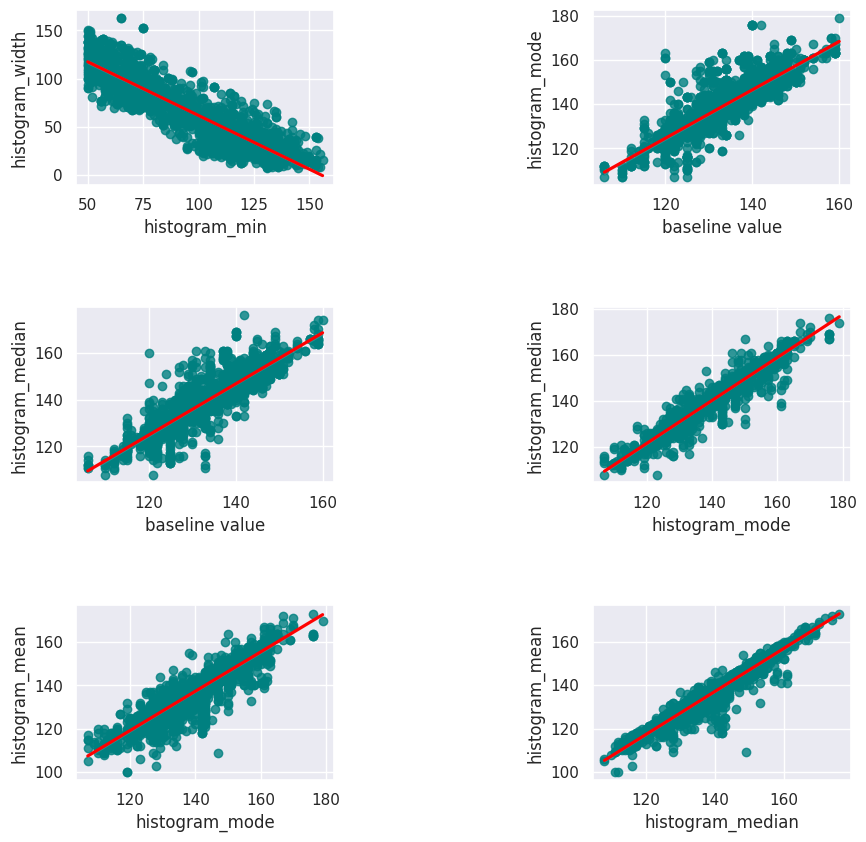

In [ ]:
#Faccio un grafico per vedere meglio il rapporto tra le features che sono risultate più correlate tra loro
sns.set()
fig, axes = plt.subplots(3,2,figsize = (10,10))
fig.subplots_adjust(hspace= 0.7, wspace= 1)


fig1 =sns.regplot(x="histogram_min", y="histogram_width",data=new_df, ax = axes[0,0],scatter_kws ={"color": "teal"} ,line_kws = {"color" :"red"})
fig2 =sns.regplot(x="baseline value", y="histogram_mode",data=new_df, ax =axes [0,1],scatter_kws ={"color": "teal"} ,line_kws = {"color" :"red"})
fig3 =sns.regplot(x="baseline value", y="histogram_median",data=new_df, ax =axes [1,0],scatter_kws ={"color": "teal"} ,line_kws = {"color" :"red"} )
fig4 =sns.regplot(x="histogram_mode", y="histogram_median",data= new_df, ax =axes [1,1],scatter_kws ={"color": "teal"} ,line_kws = {"color" :"red"})
fig5 =sns.regplot(x="histogram_mode", y="histogram_mean",data=new_df, ax =axes [2,0],scatter_kws ={"color": "teal"} ,line_kws = {"color" :"red"})
fig6 =sns.regplot(x='histogram_median', y="histogram_mean",data=new_df, ax =axes [2,1],scatter_kws ={"color": "teal"} ,line_kws = {"color" :"red"})

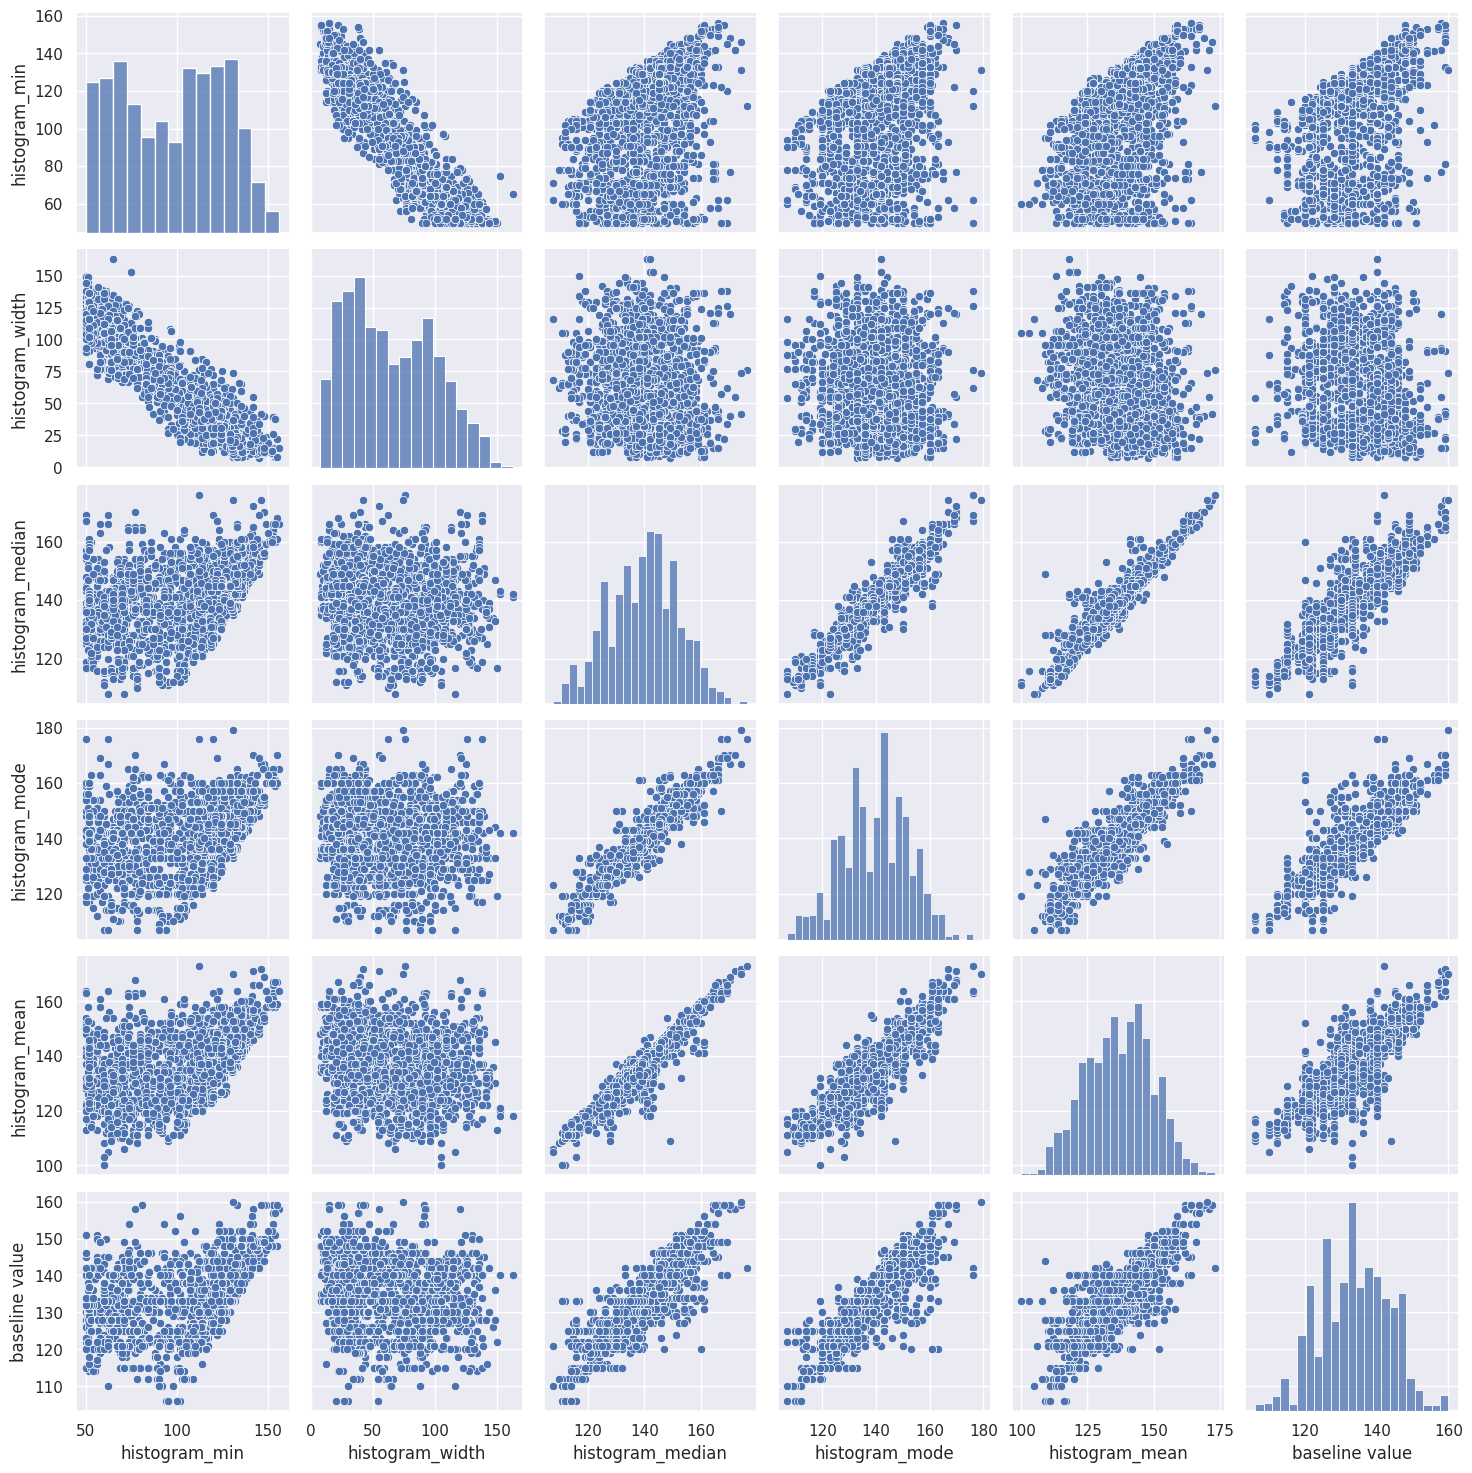

In [ ]:
sns.pairplot(new_df[["histogram_min" ,"histogram_width","histogram_median","histogram_mode","histogram_mean","baseline value"]])

come ci aspettavamo , i grafici confermano la correlazione molto alta tra queste variabili, perciò andrò ad eliminarne alcune.
Nello specifico eliminerò:
- histogram_min
- histogram_median

in quanto sono le variabili con più correlazioni .

Non voglio eliminare altre features per non perdere troppi dati 

In [ ]:
new_df.drop(["histogram_min","histogram_median"], axis =1 , inplace= True)

In [ ]:
new_df.shape

(1871, 20)

 ### FEATURES SELECTION 

In [ ]:
#divido il dataset
X = new_df.drop('fetal_health',axis=1)
y = new_df.fetal_health
#come anticipato applico una StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X) 


In [ ]:
# Applico train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y, test_size = 0.2, random_state= 20)
print(X.shape,y.shape)

(1871, 19) (1871,)


 MUTUAL INFORMATION

In [ ]:
#Applico la MutualInformation per vedere le features più rilevanti
mutual= SelectKBest(score_func= mutual_info_classif , k = "all")
mutual.fit(X_train,y_train)
X_train_mut=mutual.transform(X_train)
X_test_mut = mutual.transform(X_test)

In [ ]:
for i in range(len(mutual.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Feature 0: 0.096254
Feature 1: 0.127859
Feature 2: 0.017904
Feature 3: 0.070402
Feature 4: 0.056560
Feature 5: 0.000299
Feature 6: 0.011647
Feature 7: 0.177183
Feature 8: 0.211415
Feature 9: 0.189109
Feature 10: 0.034654
Feature 11: 0.096408
Feature 12: 0.017304
Feature 13: 0.019635
Feature 14: 0.009097
Feature 15: 0.058637
Feature 16: 0.057874
Feature 17: 0.114016
Feature 18: 0.000000


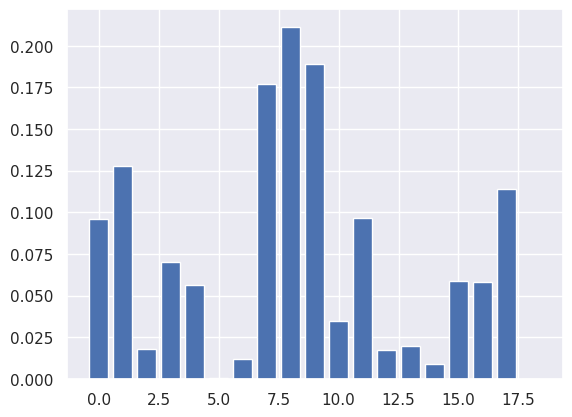

In [ ]:
plt.bar([i for i  in range(len(mutual.scores_))],mutual.scores_)
plt.show()

ANOVA


In [ ]:
#sempre per vedere le features più rilevanti applico anche il metodo ANOVA
anova= SelectKBest( score_func=f_classif, k ="all" )
anova.fit(X_train,y_train)
X_train_an= anova.transform(X_train)
X_test_an = anova.transform(X_test)



/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
for i in range(len(anova.scores_)):
    print('Feature %d: %f' % (i, anova.scores_[i]))

Feature 0: 104.833410
Feature 1: 112.569845
Feature 2: 0.053540
Feature 3: 108.925307
Feature 4: 35.776084
Feature 5: nan
Feature 6: 8.933638
Feature 7: 244.165054
Feature 8: 179.692379
Feature 9: 475.377476
Feature 10: 9.287487
Feature 11: 73.469776
Feature 12: 10.188659
Feature 13: 24.768340
Feature 14: 14.077227
Feature 15: 43.884793
Feature 16: 58.730072
Feature 17: 47.347143
Feature 18: 4.279308


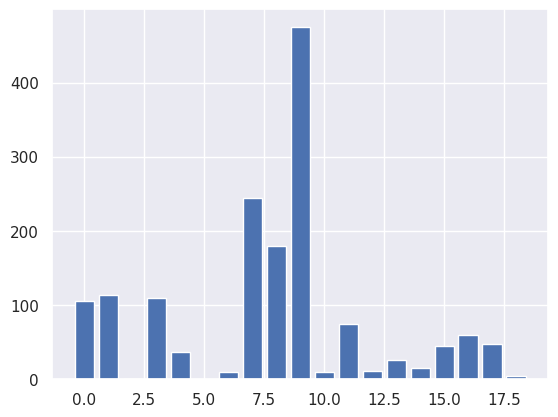

In [ ]:
plt.bar([i for i  in range(len(anova.scores_))],anova.scores_)
plt.show()

- non abbiamo utilizzato il metodo del chi2 poichè le variabili non erano categoriche e alcune avevano anche verso negativo
- i due metodi di feature selection utilizzati hanno dato risultati molto diversi, in questo caso, avendo già utilizzato una matrice di correlazione per vedere le correlazioni lineari e avendo in questo modo già eliminato due features , ci affideremo al metodo della mutual information che tiene meglio conto anche delle correlazioni non lineari.


### METRICS SELECTION

Poichè il nostro modello è molto sbilanciato , l'accuratezza non sarebbe una buona metrica di valutazione.
Utilizzeremo quindi altre metriche quali:

- Confusion matrix 

- Un grafico KDE 

- F1 score

La matrice di confusione ci fa vedere come siano state assegnate le previsioni ( falso positivo/ falso negativo/...).
Il grafico KDE ci fa vedere graficamente la differenza tra y_test e la predizione fatta dal modello.
La metrica  F1 che altro non è se non la media armonica tra precisione/ richiamo e si occupa di controllare sia i falsi negativi che i falsi positivi.Nel caso specifico essendo un dataset molto sbilanciato ho deciso di utilizzare average = Macro.

### MODEL SELECTION
METODO 1: UTILIZZO TUTTE LE FEATURES DEL DATASET

Effettuo rapidamente uno spot-check utilizzando KFold e la Cross_validation ,in questo caso essendo solo un rapido check per la scelta del modello utilizzerò  solo la metrica F1_macro come metodo di valutazione.

In [ ]:
#LOGISTIC REGRESSION
kfold = KFold(n_splits=10,shuffle=True , random_state=10) 
model_lr = LogisticRegression(max_iter= 150)
score= cross_val_score(model_lr, X_train, y_train, cv=kfold, scoring='f1_macro')
print(f'f1_macro: {score.mean():.2f}')


f1_macro: 0.72


In [ ]:
#RANDOM FOREST 
kfold = KFold(n_splits=10,shuffle=True , random_state=10) 
model_rf = RandomForestClassifier()
score= cross_val_score(model_rf, X_train, y_train, cv=kfold, scoring= "f1_macro")
print(f'f1_macro: {score.mean():.2f}')


f1_macro: 0.86


In [ ]:
#k pre-validation 
for k in [3,5,7,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)
    validation_f1 =f1_score(y_train, y_train_pred, average = "macro")
    print('Validation f1_macro with k {}: {:.2f}'.format(k, validation_f1)) 

Validation f1_macro with k 3: 0.87
Validation f1_macro with k 5: 0.82
Validation f1_macro with k 7: 0.80
Validation f1_macro with k 9: 0.71


In [ ]:
#KneighborsClassifier 
kfold = KFold(n_splits=10,shuffle=True , random_state=10) 
model_knn = KNeighborsClassifier(n_neighbors =3)
score= cross_val_score(model_knn, X_train, y_train, cv=kfold, scoring='f1_macro')
print(f'f1_macro: {score.mean():.2f}')


f1_macro: 0.75


Confrontando i tre modelli vediamo come la Random Forest sembra essere il modello più performante, mentre la LogisticRegression ha un risultato leggermente inferiore rispetto al KNeighborsClassifier.

Ho deciso comunque di provare ad utilizzare la regressione logistica poichè per il modello della Kneighbors Classifier abbiamo già effetuato una validazione , mentre per la regressione logistica ,tramite la validazione dei parametri, abbiamo ancora margine di miglioramento.

RANDOM FOREST

In [ ]:
rf= RandomForestClassifier(random_state = 1)
param_grid = {"n_estimators": [50,100,1000],
              "max_features" :['sqrt', 'log2', None]
              }
#Applico la GridSearch per cercare gli iperparametri migliori
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, scoring="f1_macro",n_jobs=-1 )
CV_rf.fit(X_train, y_train)#adatto il modello al dataset

print("Best: %f using %s" % (CV_rf.best_score_, CV_rf.best_params_))

Best: 0.850661 using {'max_features': None, 'n_estimators': 50}


In [ ]:
best_rf = CV_rf
yp_test = best_rf.predict(X_test)#effettuo la predizione su yp_test

In [ ]:
print(f'Model f1 on test set: {f1_score(y_test, yp_test, average="macro"):.2f}')
acc =accuracy_score(y_test,yp_test)
print(f'Model accuracy on test set: {acc:.2f}')
rec= recall_score(y_test,yp_test, average="macro")
print(f'Model recall on test set:{rec:.2f}') 
prec= precision_score(y_test,yp_test, average="macro")
print(f'Model precision on test set:{prec:.2f}') 

Model f1 on test set: 0.86
Model accuracy on test set: 0.92
Model recall on test set:0.85
Model precision on test set:0.89


Un rapido controllo alle metriche più comuni suggerisce che le prestazioni sia buone.

CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test,yp_test )
cm_df = pd.DataFrame(cm,
                     index= ["NORMALE","SOSPETTO","PATOLOGICO"],
                     columns = ["NORMALE","SOSPETTO","PATOLOGICO"])

<function matplotlib.pyplot.show(close=None, block=None)>

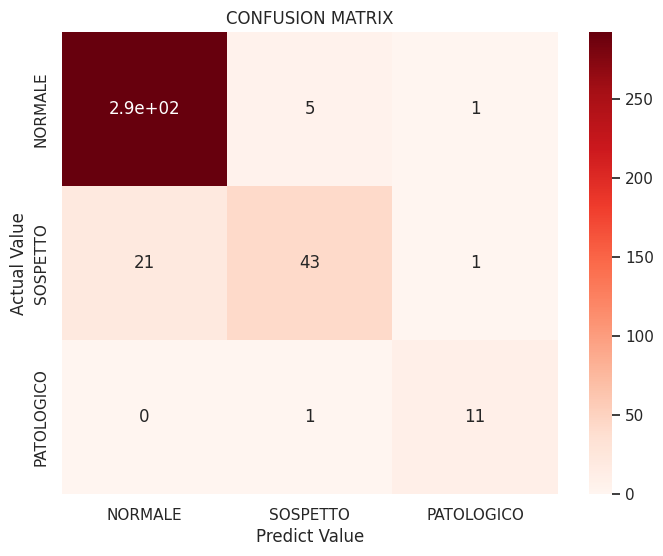

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df , annot= True, cmap = "Reds")
plt.title("CONFUSION MATRIX")
plt.ylabel("Actual Value")
plt.xlabel("Predict Value")
plt.show

Dalla matrice di confusione possiamo vedere come il nostro modello performi bene , infatti i falsi positivi e i falsi negativi sono nettamente minori rispetto a i casi correttamente classificati.

GRAFICO KDE 

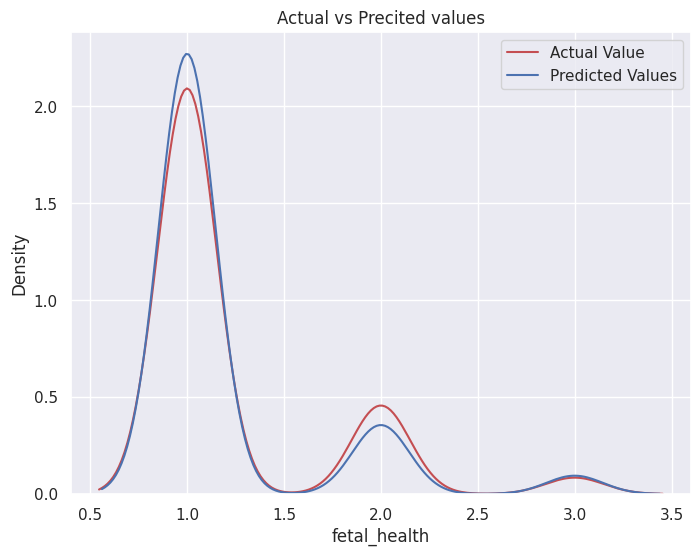

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.kdeplot(y_test, color="r", label="Actual Value") #valori reali
sns.kdeplot(yp_test, color="b", label="Predicted Values", ax=ax) #valori predetti

plt.title('Actual vs Precited values')
plt.legend()
plt.show()

Dal grafico vediamo come in linea di massima il modello abbia lavorato bene, anche se : 
- la classe 1 è stata leggermente sovrastimata (prevedibile  dal momento che era la classe con più elementi)
- la classe 2 è stata sottostimata
- la classe 3 (PATOLOGICO) è quella che meglio è stata predetta, come detto in precedenza era la classe che più ci interessava.

LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(max_iter=5000 , penalty= "l2")

param_grid= { "C": [0.001,0.01,0.1,1,10],
             "solver":["lbfgs","sag","newton-cg"]

    }
    
CV_lr = GridSearchCV(lr, param_grid=param_grid , cv=5, scoring= "f1_macro",n_jobs=-1 )
CV_lr.fit(X_train, y_train)

print("Best: %f using %s" % (CV_lr.best_score_, CV_lr.best_params_))


Best: 0.735841 using {'C': 10, 'solver': 'sag'}


In [ ]:
best_lr= CV_lr
yp_test = best_lr.predict(X_test)

In [ ]:
print(f'Model f1 on test set: {f1_score(y_test, yp_test, average="macro"):.2f}')
acc =accuracy_score(y_test,yp_test)
print(f'Model accuracy on test set: {acc:.2f}')
rec= recall_score(y_test,yp_test, average="macro")
print(f'Model recall on test set:{rec:.2f}') 
prec= precision_score(y_test,yp_test, average="macro")
print(f'Model precision on test set:{prec:.2f}') 

Model f1 on test set: 0.73
Model accuracy on test set: 0.89
Model recall on test set:0.73
Model precision on test set:0.74


In questo caso i valori delle metriche sono leggermente più bassi

CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test,yp_test )
cm_df = pd.DataFrame(cm,
                     index= ["NORMALE","SOSPETTO","PATOLOGICO"],
                     columns = ["NORMALE","SOSPETTO","PATOLOGICO"])

<function matplotlib.pyplot.show(close=None, block=None)>

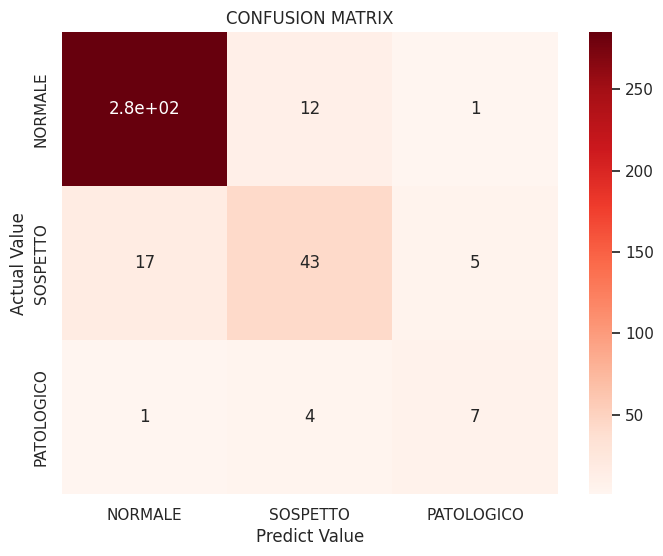

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df , annot= True, cmap = "Reds")
plt.title("CONFUSION MATRIX")
plt.ylabel("Actual Value")
plt.xlabel("Predict Value")
plt.show

Vediamo dal grafico come in questo caso la predizione sia leggeremente meno precisa di quella fatta dalla Random Forest ma comunque  buona , vediamo come la diagonale che rappresenta le predizioni corrette sia molto più alta dei falsi positivi e dei falsi negativi

GRAFICO KDE

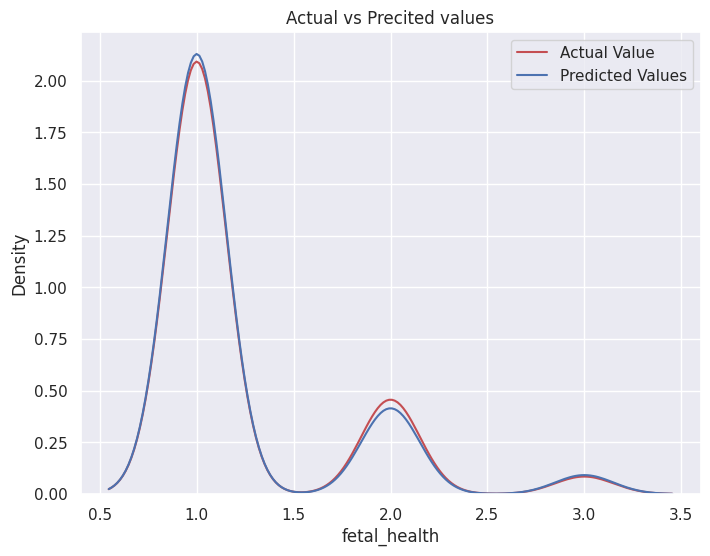

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.kdeplot(y_test, color="r", label="Actual Value") #
sns.kdeplot(yp_test, color="b", label="Predicted Values", ax=ax) 


plt.title('Actual vs Precited values')
plt.legend()
plt.show()

Anche la LogisticRegression si è adatta bene ai dati , vediamo però che  :
- la classe 2 è stata leggermente  sottostimata 
- mentre le classi 1 e 3 sono molto buone.

Da notare come le altre metriche utilizzate sembravano migliori nella RandomForest , mentre il gragico KDE ci fa vedere come la LogisticRegression abbia fatto comunque  un buon lavoro nella predizione di yp_test.



### METODO 2 : UTILIZZO SOLO LE FEATURES PIU' IMPORTANTI

Come avevamo detto in precedenza ci affideremo alla MutualInformation per la selezione delle features più importanti.
Guardando il grafico fatto precedentemente  vediamo come le features 7,8,9 risultino quelle più indicate, nello specifico:
- 7 = "prolongued_decelerations"                              
- 8 =  "abnormal_short_term_variability"                      
- 9 =  "mean_value_of_short_term_variability"


In [ ]:
#creo un nuovo dataset con solo le 3 features 
new_df_mutual = new_df[["prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","fetal_health"]]
new_df_mutual.head()

,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,fetal_health
1,0.0,17.0,2.1,1.0
2,0.0,16.0,2.1,1.0
3,0.0,16.0,2.4,1.0
4,0.0,16.0,2.4,1.0
10,0.0,64.0,1.9,2.0


In [ ]:
#ridivido il nuovo dataset 
X=new_df_mutual.drop("fetal_health", axis=1 )
y= new_df_mutual.fetal_health
#riapplico il train_test_split
X_train,X_test,y_train ,y_test= train_test_split(X,y,test_size = 0.2, random_state= 20)


Anche qui facciamo come prima cosa un rapido spot-check

In [ ]:
#LOGISTIC REGRESSION
kfold = KFold(n_splits=10,shuffle=True , random_state=10) 
model_lr = LogisticRegression(max_iter= 150)
score= cross_val_score(model_lr, X_train, y_train, cv=kfold, scoring='f1_macro')
print(f'f1_macro: {score.mean():.2f}')


f1_macro: 0.56


In [ ]:
#RANDOM FOREST 
kfold = KFold(n_splits=10,shuffle=True , random_state=10) 
model_rf = RandomForestClassifier()
score= cross_val_score(model_rf, X_train, y_train, cv=kfold, scoring= "f1_macro")
print(f'f1_macro: {score.mean():.2f}')

f1_macro: 0.65


In [ ]:
#k pre-validation 
for k in [3,5,7,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)
    validation_f1 =f1_score(y_train, y_train_pred, average = "macro")
    print('Validation f1_macro with k {}: {:.2f}'.format(k, validation_f1)) 

Validation f1_macro with k 3: 0.74
Validation f1_macro with k 5: 0.74
Validation f1_macro with k 7: 0.74
Validation f1_macro with k 9: 0.72


In [ ]:
#KneighborsClassifier 
kfold = KFold(n_splits=10,shuffle=True , random_state=10) 
model_knn = KNeighborsClassifier(n_neighbors =3)
score= cross_val_score(model_knn, X_train, y_train, cv=kfold, scoring='f1_macro')
print(f'f1_macro: {score.mean():.2f}')

f1_macro: 0.65


Applico lo stesso ragionamento di prima e andrò ad utilizzare la RandomForest e la LogisticRegression

###RANDOM FOREST

In [ ]:
rf= RandomForestClassifier(random_state = 1)
param_grid = {"n_estimators": [50,100,1000],
              "max_features" :['sqrt', 'log2', None]
              }
#Applico la GridSearch per cercare gli iperparametri migliori
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, scoring="f1_macro",n_jobs=-1 )
CV_rf.fit(X_train, y_train)#adatto il modello al dataset

print("Best: %f using %s" % (CV_rf.best_score_, CV_rf.best_params_))

Best: 0.632496 using {'max_features': 'sqrt', 'n_estimators': 1000}


In [ ]:
best_rf = CV_rf
yp_test = best_rf.predict(X_test)#effettuo la predizione su yp_test

In [ ]:
print(f'Model f1 on test set: {f1_score(y_test, yp_test, average="macro"):.2f}')
acc =accuracy_score(y_test,yp_test)
print(f'Model accuracy on test set: {acc:.2f}')
rec= recall_score(y_test,yp_test, average="macro")
print(f'Model recall on test set:{rec:.2f}') 
prec= precision_score(y_test,yp_test, average="macro")
print(f'Model precision on test set:{prec:.2f}') 

Model f1 on test set: 0.70
Model accuracy on test set: 0.88
Model recall on test set:0.67
Model precision on test set:0.77


Possiamo già iniziare a vedere come il modello sembra essere meno preciso.

CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test,yp_test )
cm_df = pd.DataFrame(cm,
                     index= ["NORMALE","SOSPETTO","PATOLOGICO"],
                     columns = ["NORMALE","SOSPETTO","PATOLOGICO"])

<function matplotlib.pyplot.show(close=None, block=None)>

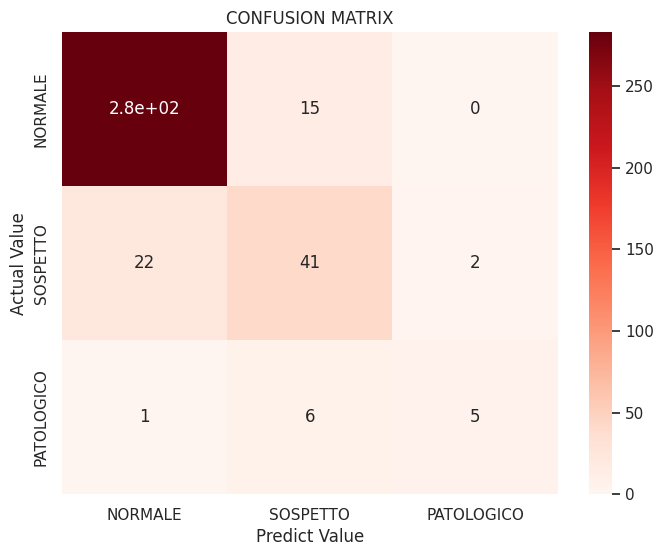

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df , annot= True, cmap = "Reds")
plt.title("CONFUSION MATRIX")
plt.ylabel("Actual Value")
plt.xlabel("Predict Value")
plt.show

- In questo caso vediamo comunque che la maggior parte dei valori sono sulla diagonale(quindi giustamente assegnati ) , ma ci sono un po' più errori di assegnazione rispetto alle precedenti.

GRAFICO KDE

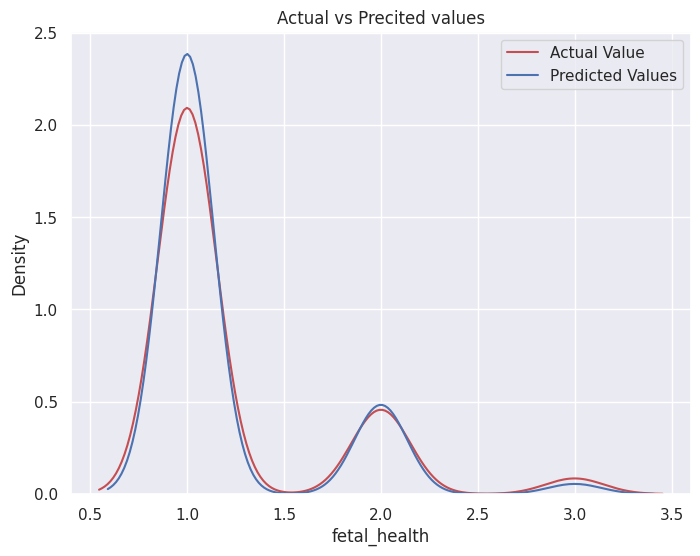

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.kdeplot(y_test, color="r", label="Actual Value") #valori reali
sns.kdeplot(yp_test, color="b", label="Predicted Values", ax=ax) #valori predetti

plt.title('Actual vs Precited values')
plt.legend()
plt.show()

- Già da questo grafico vediamo come la Random Forest si sia adattata meglio ai dati di test nel caso del metodo 1 .


### LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression(max_iter=5000 , penalty= "l2")

param_grid= { "C": [0.001,0.01,0.1,1,10],
             "solver":["lbfgs","sag","newton-cg"]

    }
    
CV_lr = GridSearchCV(lr, param_grid=param_grid , cv=5, scoring= "f1_macro",n_jobs=-1 )
CV_lr.fit(X_train, y_train)

print("Best: %f using %s" % (CV_lr.best_score_, CV_lr.best_params_))

Best: 0.596901 using {'C': 10, 'solver': 'lbfgs'}


In [ ]:
best_lr= CV_lr
yp_test = best_lr.predict(X_test)

In [ ]:
print(f'Model f1 on test set: {f1_score(y_test, yp_test, average="macro"):.2f}')
acc =accuracy_score(y_test,yp_test)
print(f'Model accuracy on test set: {acc:.2f}')
rec= recall_score(y_test,yp_test, average="macro")
print(f'Model recall on test set:{rec:.2f}') 
prec= precision_score(y_test,yp_test, average="macro")
print(f'Model precision on test set:{prec:.2f}') 

Model f1 on test set: 0.67
Model accuracy on test set: 0.85
Model recall on test set:0.60
Model precision on test set:0.84


CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_test,yp_test )
cm_df = pd.DataFrame(cm,
                     index= ["NORMALE","SOSPETTO","PATOLOGICO"],
                     columns = ["NORMALE","SOSPETTO","PATOLOGICO"])

<function matplotlib.pyplot.show(close=None, block=None)>

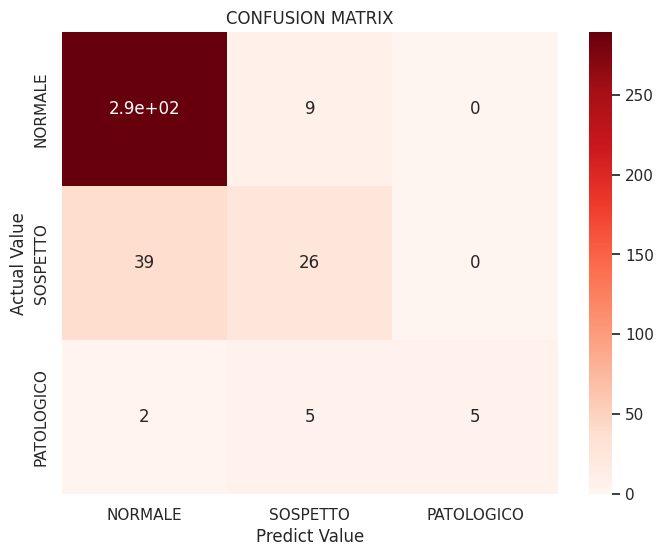

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df , annot= True, cmap = "Reds")
plt.title("CONFUSION MATRIX")
plt.ylabel("Actual Value")
plt.xlabel("Predict Value")
plt.show

Da questa confusion matrix vediamo già che ci sono  diversi errori di assegnazione.

GRAFICO KDE 

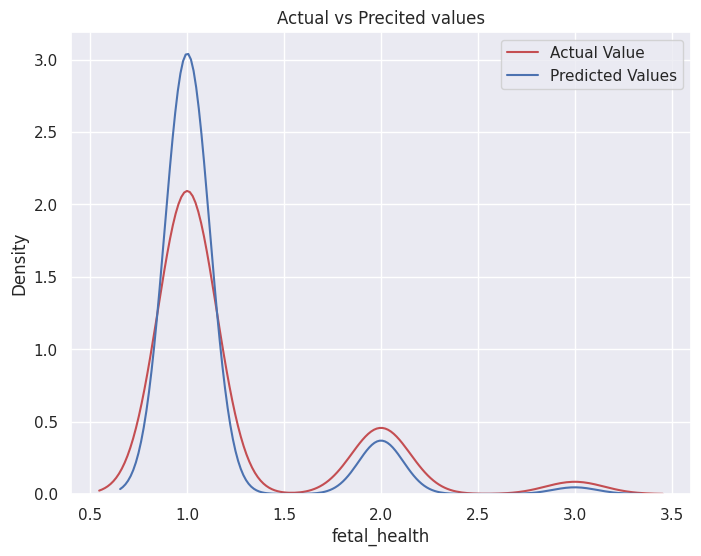

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.kdeplot(y_test, color="r", label="Actual Value") #valori reali
sns.kdeplot(yp_test, color="b", label="Predicted Values", ax=ax) #valori predetti

plt.title('Actual vs Precited values')
plt.legend()
plt.show()

- In questo caso , purtroppo, il modello non è riuscito ad ottenere un buon risultato.
- ha sovrastimato la classe 1 (plausibilmente perchè è la classe più sbilanciata)
-  ma soprattutto la classe 3 (PATOLOGICO) risulta molto sottostimata

### CONCLUSIONE :

In conclusione possiamo dire che per il secondo metodo la foresta casuale ha dato decisamente un risultato migliore rispetto alla regressione logistica ,che non solo non si è adattata molto bene al modello ma non ha quasi predetto la classe 3.
Nonostante questo , il metodo numero 1 ha ottenuto risultati migliori con entrambi i modelli e la scelta di utilizzare i grafici KDE è risultata molto utile in quanto riusciamo a vedere molto meglio la qualità delle varie predizioni.
In entrambi i metodi vediamo come la classe n1 sia quasi sempre sovrastimata a causa dello sbilanciamento del dataset, ma una delle cose che più ci interessava era classidicare bene la classe 3 in quanto un falso negativo in questo caso potrebbe essere davvero dannoso, ed entrambi i modelli nel primo metodo hanno fatto un buon lavoro.

